In [14]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [15]:
df=pd.read_csv("best-selling-books.csv")
df

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Novella
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,Fantasy
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,Family saga
...,...,...,...,...,...,...
169,The Goal,Eliyahu M. Goldratt,English,1984,10.0,NaN
170,Fahrenheit 451,Ray Bradbury,English,1953,10.0,NaN
171,Angela's Ashes,Frank McCourt,English,1996,10.0,NaN
172,The Story of My Experiments with Truth (સત્યના...,Mohandas Karamchand Gandhi,Gujarati,1929,10.0,NaN


In [18]:
from sklearn.preprocessing import LabelEncoder

# Label encode categorical columns
label_cols = ['Book', 'Author(s)', 'Original language', 'Genre']

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col].astype(str))  # convert NaN to string before encoding

# Convert 'First published' column to numeric (in case of any text or missing values)
df['First published'] = pd.to_numeric(df['First published'], errors='coerce')

# Select all numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_df.corr()
correlation_matrix

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
Book,1.000000,-0.017139,-0.016509,-0.137371,0.036378,-0.022941
Author(s),-0.017139,1.000000,-0.084285,-0.076534,0.096573,-0.090242
Original language,-0.016509,-0.084285,1.000000,-0.079097,-0.037291,-0.032513
First published,-0.137371,-0.076534,-0.079097,1.000000,-0.124346,0.027293
Approximate sales in millions,0.036378,0.096573,-0.037291,-0.124346,1.000000,-0.456455
Genre,-0.022941,-0.090242,-0.032513,0.027293,-0.456455,1.000000


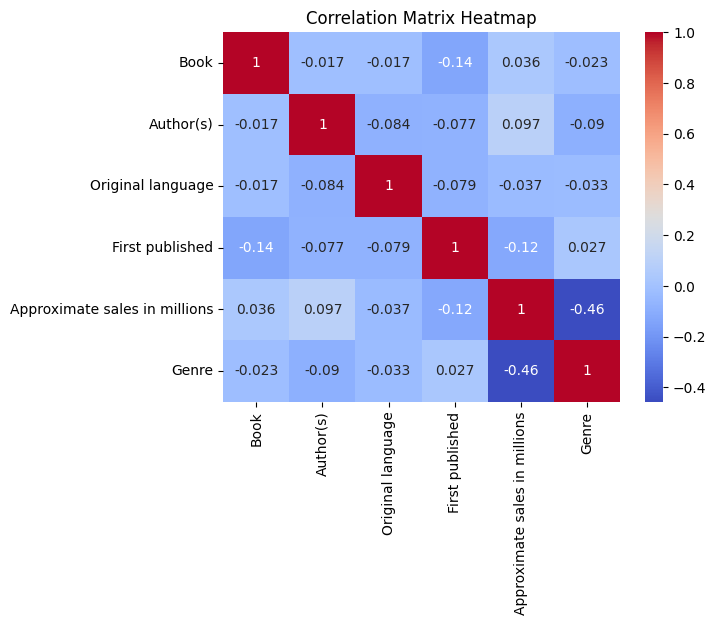

In [20]:
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()